In [ ]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
from numpy import percentile
import pandas as pd
import pandas_profiling 
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots



In [ ]:
titanic_data=pd.read_csv('../input/titanic/train.csv')
netflix_data=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
airbnb_data=pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

<font size="+3" color='#0e46ad'><b> <center><u>Practical statistics - Part 1 - Descriptive Statistics</u></center></b></font>

# Objective 

Statistics is one of the key fundamental skills required for data science. Any expert in data science would surely recommend learning / upskilling yourself in statistics.

However, if you go out and look for resources on statistics, you will see that a lot of them tend to focus on the mathematics. They will focus on derivation of formulas rather than simplifying the concept. I believe, statistics can be understood in very simple and practical manner. That is why I have created this kernal.

So, go through the Kernal and work through the examples and develop your statistics skills for data science.

<font size="+2" color='green'><b>Please Upvote my notebook if you think it is helpful.</b></font>

### Before learning the details of statistics, take the time to understand the big picture. Statistics lets you analyze a set of data and make conclusions that can be generalized beyond that set of data.

# Table of contents

- <a href='#1'>1. Introduction</a>
    - <a href='#1.1'>1.1 What is Statistics ?</a>
    - <a href='#1.2'>1.2 Types of Statistics ?</a>
- <a href='#2'>2. Variable Types: Categorical Variables and Quantitative variables</a>
    - <a href='#2.1'>2.1 Categorical Variables </a>
    - <a href='#2.2'>2.2 Quantitative Variables </a>   
- <a href='#3'>3. Summarizing Data - Univariate</a>
    - <a href='#3.1'>3.1 Categorical Data - Bar chart and pie chart </a>
    - <a href='#3.2'>3.2 Quantitative Data - Histogram</a>
    - <a href='#3.3'>3.3 Quantitative Data - Numerical summary</a>
    - <a href='#3.4'>3.4 Standard Score (Empirical Rule)</a>   
    - <a href='#3.5'>3.5 Quantative Data - Box plots</a>  
- <a href='#4'>4. Summarizing Data - Multivariate</a>
    - <a href='#4.1'>4.1 Side-by-Side Bar chart</a>
    - <a href='#4.2'>4.2 Stacked Bar chart</a>    
    - <a href='#4.3'>4.3 Correlation <a/>

# <a id='1'> 1. Introduction</a>

### <a id='1.1'> 1.1 What is Statistics ?</a>
Statistics is a form of mathematical analysis that uses quantified models, representations and synopses for a given set of experimental data or real-life studies. Statistics studies methodologies to gather, review, analyze and draw conclusions from data. 

> "Statistics means never having to say you are certain."   If a statistical conclusion ever seems certain, you probably are misunderstanding something. The whole point of statistics is to quantify uncertainty.

### <a id='1.2'> 1.2 Types of Statistics</a>
Statistics is used in various disciplines such as psychology, business, physical and social sciences, humanities, government, and manufacturing. Statistical data is gathered using a sample procedure or other method.

Two types of statistical methods are used in analyzing data:

 * **Descriptive statistics** : 
 
Descriptive statistics are used to synopsize data from a sample exercising the mean or standard deviation."Descriptive statistics" simply describes data without reaching any general conclusions. But the challenging and difficult aspects of statistics are all about reaching general conclusions from limited data.


 * **Inferential statistics** :
 
Inferential statistics are used when data is viewed as a subclass of a specific population.With inferential statistics, you are trying to reach conclusions that extend beyond the immediate data alone. For instance, we use inferential statistics to try to infer from the sample data what the population might think. Or, we use inferential statistics to make judgments of the probability that an observed difference between groups is a dependable one or one that might have happened by chance in this study. Thus, we use inferential statistics to make inferences from our data to more general conditions; we use descriptive statistics simply to describe what’s going on in our data.

### In this particular notebook, I will mainly talk about Descriptive statistics 

# <a id='2'> 2. Variable Types: Categorical Variables and Quantitative variables</a>

## <a id='2.1'> 2.1  Categorical Variables </a>

Classifies individuals or items different groups

### Nominal 

Let’s start with the easiest one to understand.  Nominal scales are used for labeling variables, without any quantitative value.  “Nominal” scales could simply be called “labels.” 


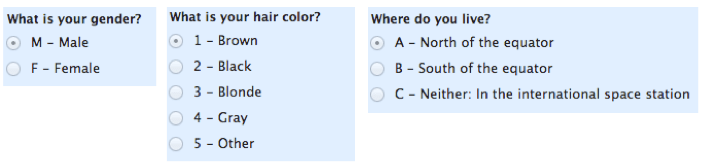



### Ordinal

With ordinal scales, the order of the values is what’s important and significant, but the differences between each one is not really known.  Take a look at the example below.  In each case, we know that a #4 is better than a #3 or #2, but we don’t know–and cannot quantify–how much better it is.  For example, is the difference between “OK” and “Unhappy” the same as the difference between “Very Happy” and “Happy?”  We can’t say.

Ordinal scales are typically measures of non-numeric concepts like satisfaction, happiness, discomfort, etc.


<div class="alert alert-block alert-info">
<b> Note:</b>   The best way to determine central tendency on a set of ordinal data is to use the mode or median; a purist will tell you that the mean cannot be defined from an ordinal set.
    
</div>

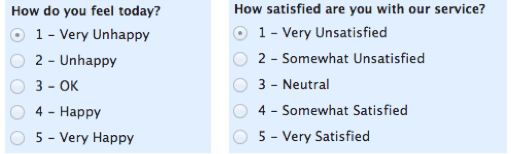

## <a id='2.2'> 2.2  Quantitative Variables </a>

Numerical or measurable quantities in ehich arithmetic operations often makes sense 

### Discrete 

Countable and finite

### Continuous

Could make on any value within interval , many possible values

# <a id='3'> 3. Summarizing Data - Univariate</a>

## <a id='3.1'> 3.1. Categorical Data - Bar chart and pie char</a>

Categorical data is usually displayed graphically as frequency bar charts and as pie charts:

### Frequency bar chart


In [ ]:
fig = go.Figure(go.Bar(
    x=titanic_data['Sex'],y=titanic_data['Sex'].value_counts(),
))
fig.update_layout(title_text='Frequency of Male and Female in titanic',xaxis_title="Gender",yaxis_title="Count")


### Pie Chart

In [ ]:
net_category=netflix_data['type'].value_counts().to_frame().reset_index().rename(columns={'index':'type','type':'count'})
fig = go.Figure([go.Pie(labels=net_category['type'], values=net_category['count'])])
fig=fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig=fig.update_layout(title="Netflix Show Types",title_x=0.5)
fig.show()

## <a id='3.2'> 3.2 Quantitative Data - Histogram</a>

### Histogram 

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.

For eg. Age distribution in Titanic dataset

In [ ]:
titanic_data.head()

In [ ]:
sns.distplot(titanic_data['Age'],kde=False)

### What is the difference between a bar chart and a histogram?
The major difference is that a histogram is only used to plot the frequency of score occurrences in a continuous data set that has been divided into classes, called bins. Bar charts, on the other hand, can be used for a great deal of other types of variables including ordinal and nominal data sets.

## <a id='3.3'>3.3 Quantitative Data - Numerical summary</a>

Data summarization provides a convenient way to describe all of the values in a data sample with just a few statistical values.

The mean and standard deviation are used to summarize data with a Gaussian distribution, but may not be meaningful, or could even be misleading, if your data sample has a non-Gaussian distribution.

The **five-number summary**, or 5-number summary for short, is a non-parametric data summarization technique.


The five-number summary involves the calculation of 5 summary statistical quantities: namely:

* **Median:** The middle value in the sample, also called the 50th percentile or the 2nd quartile.
* **1st Quartile:** The 25th percentile.
* **3rd Quartile:** The 75th percentile.
* **Minimum:** The smallest observation in the sample.
* **Maximum:** The largest observation in the sample.

In [ ]:
titanic_data.describe().tail(5)

## <a id='3.4'>3.4 Standard Score (Empirical Rule)</a>

Z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

A z-score can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). In order to use a z-score, you need to know the mean **μ** and also the population standard deviation **σ**.

For example, knowing that someone’s weight is 150 pounds might be good information, but if you want to compare it to the “average” person’s weight, looking at a vast table of data can be overwhelming (especially if some weights are recorded in kilograms). A z-score can tell you where that person’s weight is compared to the average population’s mean weight.


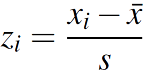

### Empirical rule (68-95-99.7)

The empirical rule states that for a normal distribution, nearly all of the data will fall within three standard deviations of the mean. The empirical rule can be broken down into three parts:

* 68% of data falls within the first standard deviation from the mean.
* 95% fall within two standard deviations.
* 99.7% fall within three standard deviations.

The rule is also called the 68-95-99 7 Rule or the Three Sigma Rule.
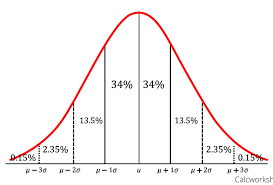

In [ ]:
mean = np.mean(titanic_data['Age'])
std = np.std(titanic_data['Age'])
def z_score(value, mean, std):
    return (value - mean) / std

In [ ]:
import random
values = []
for i in list(range(0,5)):
    value = random.choice(titanic_data.Age)
    values.append(value)
print(values)

In [ ]:
for val in values:
    z = z_score(val, mean, std)
    print(z)

In [ ]:
ax = sns.distplot(titanic_data['Age'], kde = True)

ax=plt.axvline(titanic_data['Age'].mean(), color='green')
ax=plt.axvline(titanic_data['Age'].mean()-titanic_data['Age'].std(), color='red')
ax=plt.axvline(titanic_data['Age'].mean()+titanic_data['Age'].std(), color='red')
ax=plt.axvline(titanic_data['Age'].mean()-2*titanic_data['Age'].std(), color='blue')
ax=plt.axvline(titanic_data['Age'].mean()+2*titanic_data['Age'].std(), color='blue')


## <a id='3.5'>3.5 Quantative Data - Box plots</a>

A box plot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

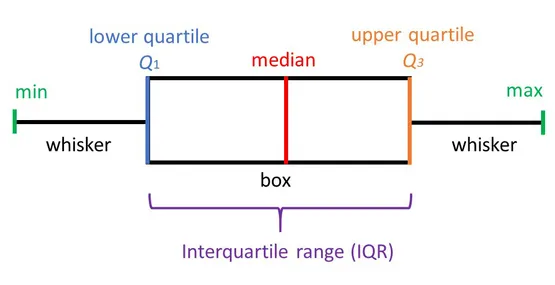

**Minimum Score**

The lowest score, excluding outliers (shown at the end of the left whisker).

**Lower Quartile**

Twenty-five percent of scores fall below the lower quartile value (also known as the first quartile).

**Median**

The median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.

**Upper Quartile**

Seventy-five percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.

**Maximum Score**

The highest score, excluding outliers (shown at the end of the right whisker).

**Whiskers**

The upper and lower whiskers represent scores outside the middle 50% (i.e. the lower 25% of scores and the upper 25% of scores).

**The Interquartile Range (or IQR)**

This is the box plot showing the middle 50% of scores (i.e., the range between the 25th and 75th percentile).

>Box plots are useful as they provide a visual summary of the data enabling researchers to ?quickly identify mean values, the dispersion of the data set, and signs of skewness.

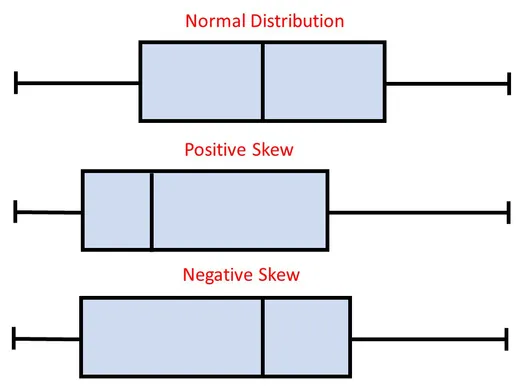

> Box plots are useful as they show outliers within a data set.
An outlier is an observation that is numerically distant from the rest of the data.
When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

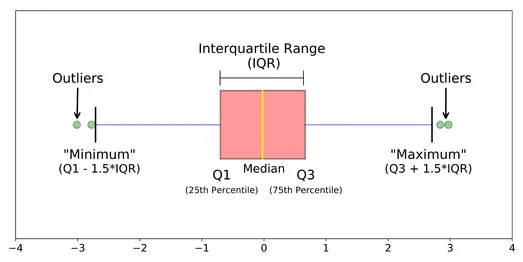

In [ ]:
fig = go.Figure(go.Box(y=titanic_data['Age'],name="Age")) 
fig.update_layout(title="Distribution of Age")

In [ ]:
age_male=titanic_data[titanic_data['Sex']=='male']['Age']
age_female=titanic_data[titanic_data['Sex']=='female']['Age']
fig = go.Figure()
fig=fig.add_trace(go.Box(y=age_male,
                     marker_color="blue",
                     name="Male age"))
fig=fig.add_trace(go.Box(y=age_female,
                     marker_color="red",
                     name="female age"))
fig.update_layout(title="Age Distribution of male and female")


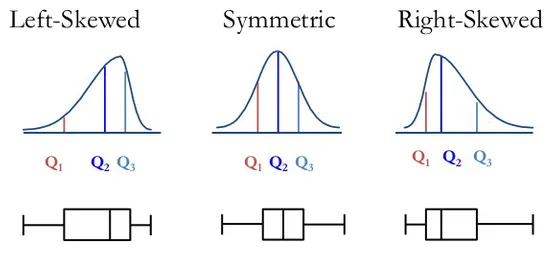

# <a id='4'> 4. Summarizing Data - Multivariate</a>

## <a id='4.1'> 4.1 Side-by-Side Bar chart</a>

In [ ]:
titanic_data.head()

In [ ]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data,
                height=6, kind="bar")
g.set_ylabels("survival probability")

## <a id='4.2'> 4.2 Stacked Bar chart</a>

In [ ]:
top_release_india=netflix_data[(netflix_data['country']=='India')&
                    ((netflix_data['release_year']==2015)|(netflix_data['release_year']==2016)|(netflix_data['release_year']==2017)|(netflix_data['release_year']==2018)|
                    (netflix_data['release_year']==2019)|(netflix_data['release_year']==2020))]['release_year'].value_counts().to_frame().reset_index().rename(columns={'index':'release_year','release_year':'count'})

top_release_us=netflix_data[(netflix_data['country']=='United States')&
                    ((netflix_data['release_year']==2015)|(netflix_data['release_year']==2016)|(netflix_data['release_year']==2017)|(netflix_data['release_year']==2018)|
                    (netflix_data['release_year']==2019)|(netflix_data['release_year']==2020))]['release_year'].value_counts().to_frame().reset_index().rename(columns={'index':'release_year','release_year':'count'})


In [ ]:
fig = go.Figure()
ax=fig.add_trace(go.Bar(x=top_release_india['release_year'],
                y=top_release_india['count'],
                name='India',
                marker_color='blue'
                ))
ax=fig.add_trace(go.Bar(x=top_release_us['release_year'],
                y=top_release_us['count'],
                name='United States',
                marker_color='violet'
                ))

fig.update_layout(title_text='Netflix shows by India/US over past 5 years',xaxis_title="Year",yaxis_title="Number of Shows",
                  barmode='stack') # by default it is group, else barmode='group'


## <a id='4.3'> 4.3 Scatter plot </a>

In [ ]:
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

In [ ]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time",
                     data=tips)

In [ ]:
ax = sns.scatterplot(x="total_bill", y="tip", size="size",
                     data=tips)

In [ ]:
g = sns.relplot(x="total_bill", y="tip",
                 col="time", hue="day", style="day",
                 kind="scatter", data=tips)

## <a id='4.4'> 4.3 Correlation </a>

Correlation shows the strength of a relationship between two variables and is expressed numerically by the correlation coefficient. The correlation coefficient's values range between -1.0 and 1.0. A perfect positive correlation means that the correlation coefficient is exactly 1.

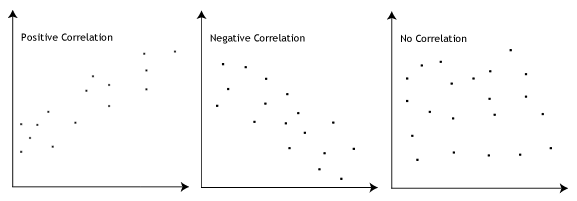

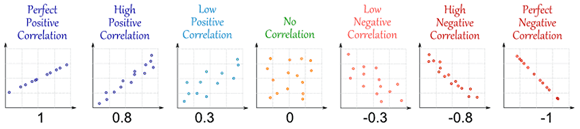

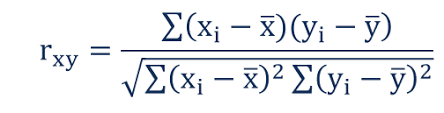

### Calculating correlation matrix in python

In [ ]:
corr_matrix=titanic_data.corr()

In [ ]:
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()